# IMB Alltoallv performance comparison

In [51]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [52]:
import sys
sys.path.append('../../../python-modules')

In [53]:
from utilities import filemanip

In [54]:
from synthanalysis import imb

In [55]:
benchmark = "Alltoallv"
systems = ['ARCHER_CrayMPICH774',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

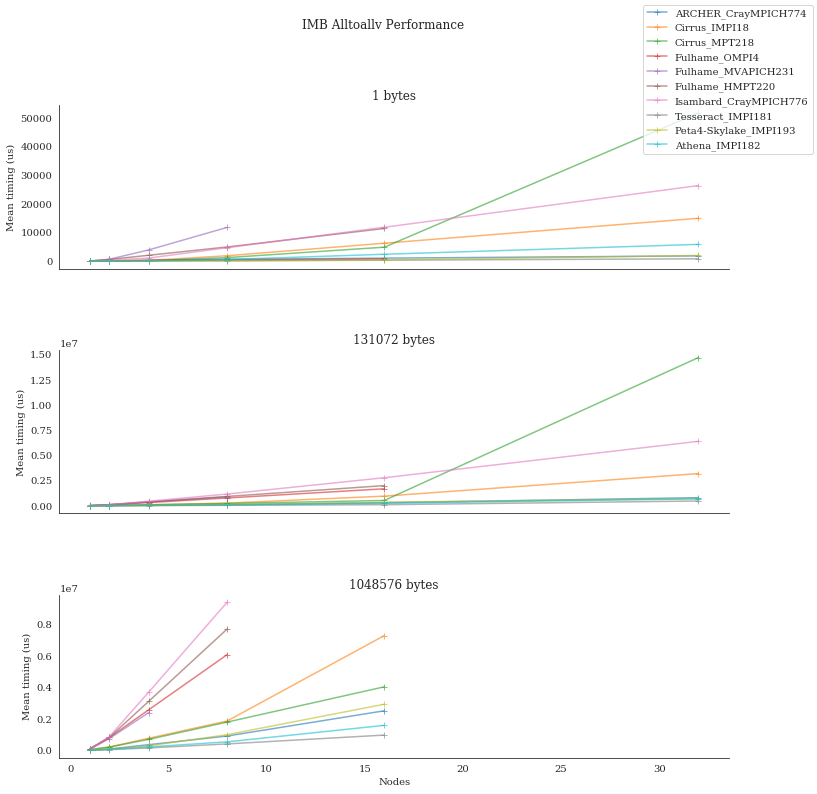

In [56]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

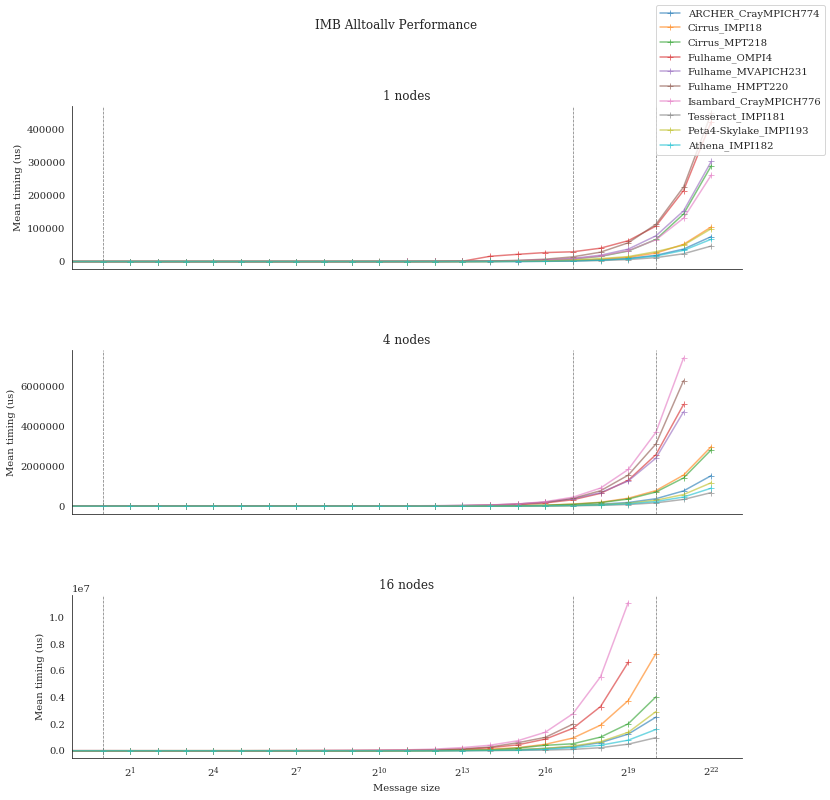

In [57]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} nodes".format(nodes), ylabel="Mean timing (us)")
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')

In [58]:
baseline = 'ARCHER_CrayMPICH774'
systems = ['Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)           

IMB Alltoallv performance relative to ARCHER_CrayMPICH774
            #nodes
      #bytes         1         2         4         8        16        32
Cirrus_IMPI18
           0      0.48      3.07      7.00      8.00      8.51      6.95
           1      0.51      0.87      1.12      0.35      0.17      0.12
           2      0.51      0.93      1.51      0.28      0.17      0.12
           4      0.50      1.05      1.26      0.34      0.15      0.13
           8      0.50      1.05      1.53      0.32      0.17      0.12
          16      0.50      1.07      1.33      0.33      0.17      0.12
          32      0.49      1.04      0.78      0.20      0.16      0.12
          64      0.54      1.05      0.84      0.24      0.17      0.12
         128      0.46      0.86      0.81      0.25      0.20      0.14
         256      0.49      0.95      1.11      0.31      0.28      0.38
         512      0.43      0.76      1.25      0.53      0.44      0.50
        1024      0.56      0.61 

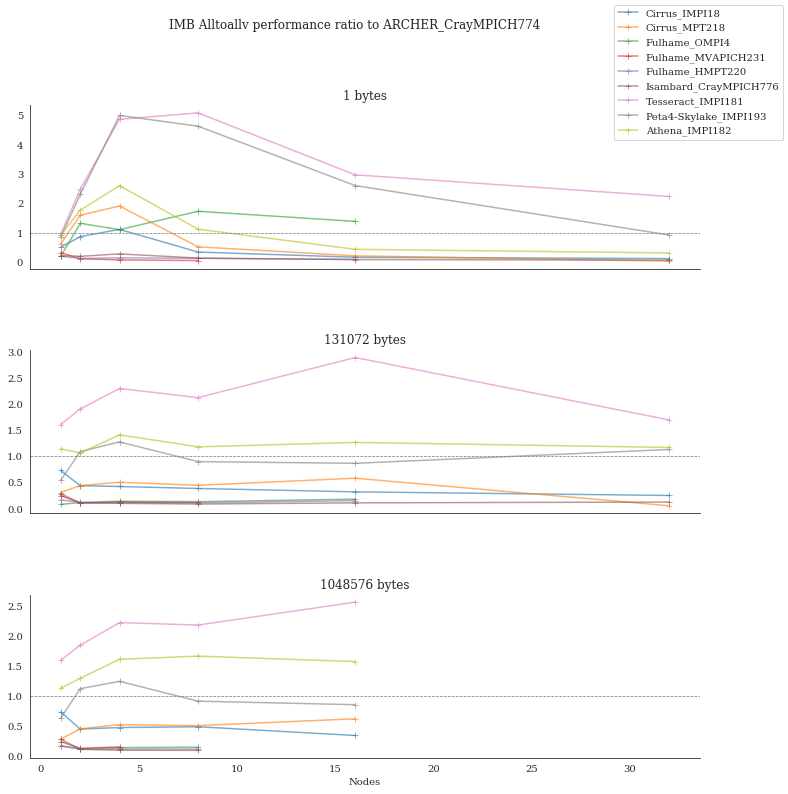

In [59]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

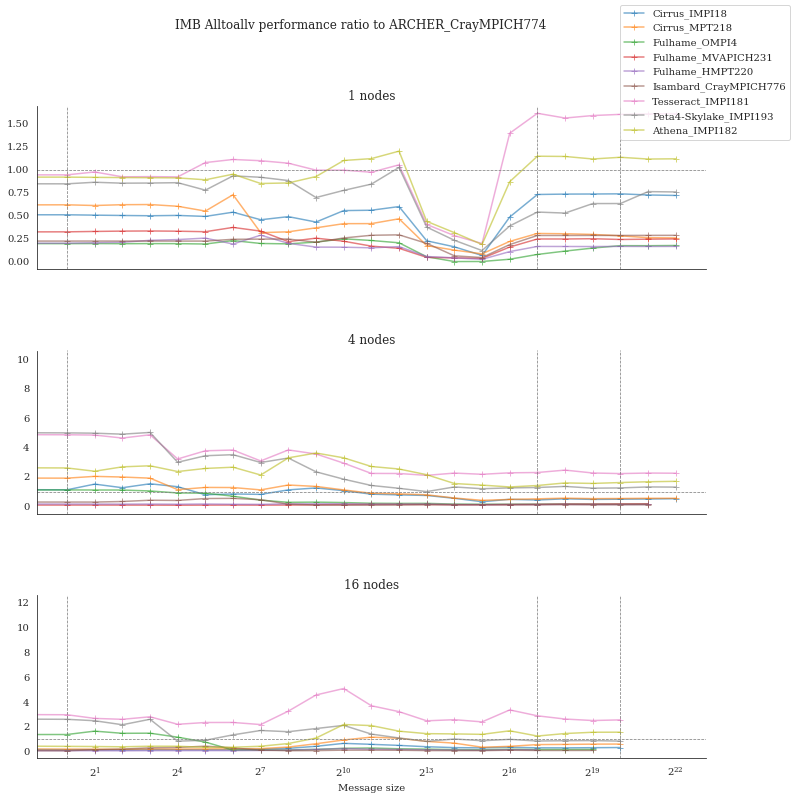

In [60]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} nodes".format(nodes))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')

### Notes

   - Overall best performance from Intel OPA in hypercube topology (Tesseract)
   - For 1 MiB message sizes, Mellanox EDR fat tree (Athena) achieves ~75% of Tesseract peformance and outperforms Intel OPA fat tree (Peta4-Skylake) by 50%. Cray Aries dragonfly (ARCHER) show similar performance to Intel OPA at tree.
   - For 128 KiB message sizes, Cray Aries dragonfly, Mellanox EDR fat tree and Intel OPA fat tree show similar performance; Mellanox EDR fat tree shows 2-2.5x performance of Cray Aries dragonfly.
   - All Arm-based systems show 10-25% peformance of Cray Aries dragonfly, irrespective of interconnect technology and MPI library.

## Cray Arm system (Isambard) performance analysis

In [61]:
benchmark = "Alltoallv"
systems = ['ARCHER_CrayMPICH774',
           'Isambard_CrayMPICH776',
           'Isambard_CrayMPICH776_32cpn',
           'Isambard_CrayMPICH776_16cpn'
          ]
cpn = {'ARCHER_CrayMPICH774': 24,
       'Isambard_CrayMPICH776': 64,
       'Isambard_CrayMPICH776_32cpn': 32,
       'Isambard_CrayMPICH776_16cpn': 16
      }
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

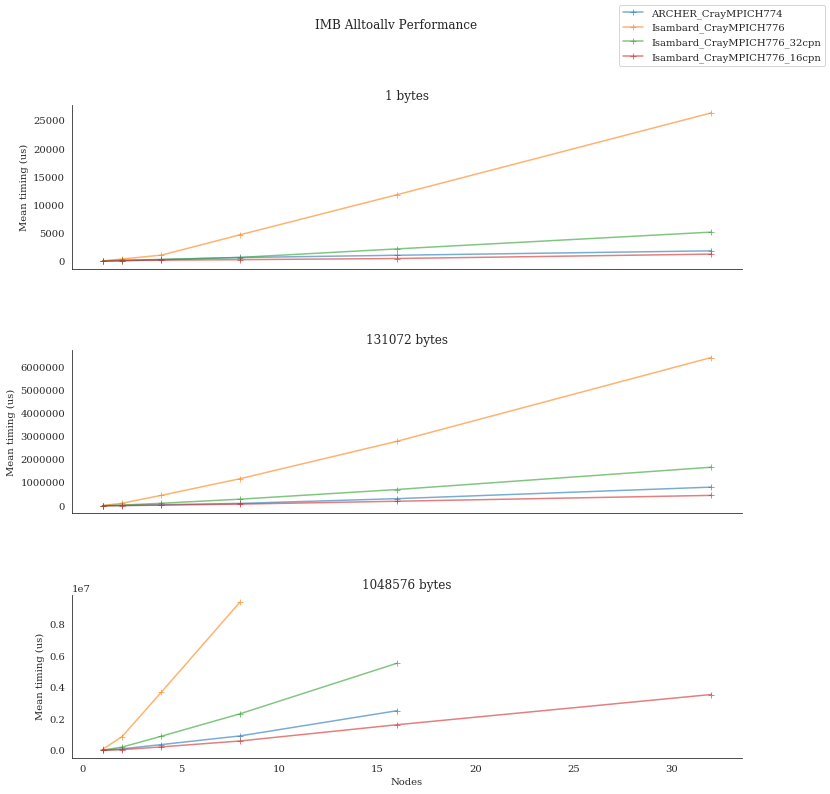

In [62]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

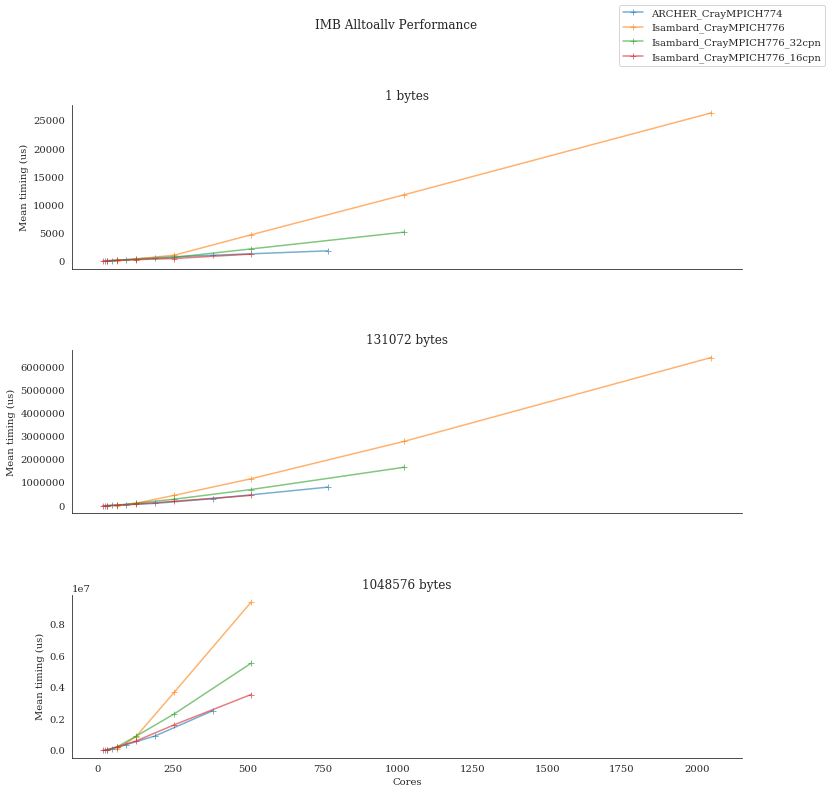

In [63]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        corelist = [x*cpn[system] for x in nodelist]
        ax.plot(corelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Cores")
fig.legend(handles, labels, loc='upper right')

In [64]:
baseline = 'ARCHER_CrayMPICH774'
systems = ['Isambard_CrayMPICH776',
           'Isambard_CrayMPICH776_32cpn',
           'Isambard_CrayMPICH776_16cpn'
          ]
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)

IMB Alltoallv performance relative to ARCHER_CrayMPICH774
            #nodes
      #bytes         1         2         4         8        16        32
Isambard_CrayMPICH776
           0      0.31      0.35      0.89      1.23      1.76      1.70
           1      0.23      0.20      0.28      0.14      0.09      0.07
           2      0.23      0.21      0.28      0.20      0.17      0.14
           4      0.23      0.22      0.32      0.32      0.22      0.21
           8      0.23      0.20      0.41      0.37      0.32      0.27
          16      0.23      0.24      0.39      0.42      0.35      0.34
          32      0.23      0.27      0.52      0.43      0.46      0.26
          64      0.25      0.28      0.54      0.50      0.31      0.19
         128      0.25      0.22      0.44      0.18      0.13      0.10
         256      0.25      0.21      0.14      0.08      0.09      0.14
         512      0.21      0.09      0.08      0.08      0.10      0.13
        1024      0.26   

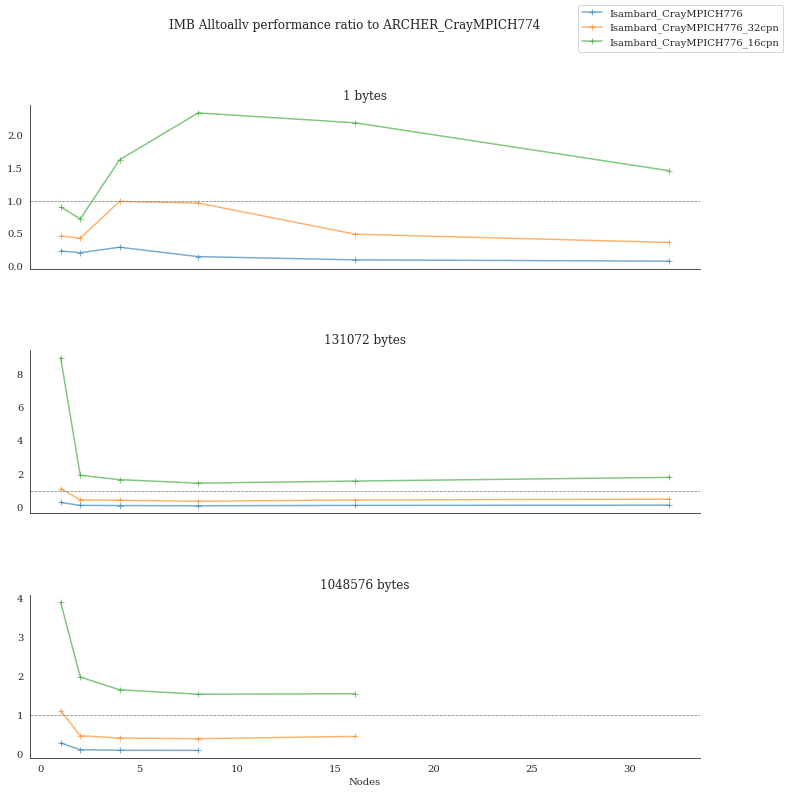

In [65]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

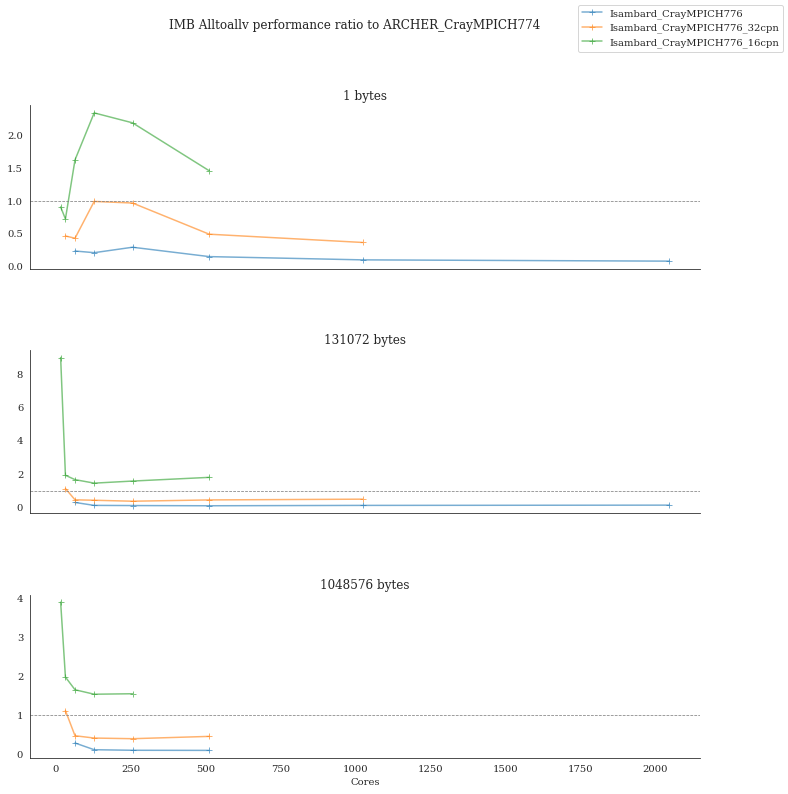

In [66]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        corelist = [x*cpn[system] for x in nodelist]
        ax.plot(corelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Cores")
fig.legend(handles, labels, loc='upper right')

### Notes

  - For 128 KiB and 1 MiB messages the performance relative to x86_64 system with the same interconnect is poor - typically 10-25% of the performance
  - Halving the number of MPI ranks per node roughly doubles the performance
  - Reducing the number of MPI ranks per node by a factor of 4 increases the performance by a factor of 4 and brings it into line with the performance of the x86_64 system

## IB Arm system performance analysis

In [67]:
benchmark = "Alltoallv"
systems = ['ARCHER_CrayMPICH774',
           'Fulhame_OMPI4',
           'Fulhame_OMPI4_32cpn'
          ]
cpn = {'ARCHER_CrayMPICH774': 24,
       'Fulhame_OMPI4': 64,
       'Fulhame_OMPI4_32cpn': 32
      }
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

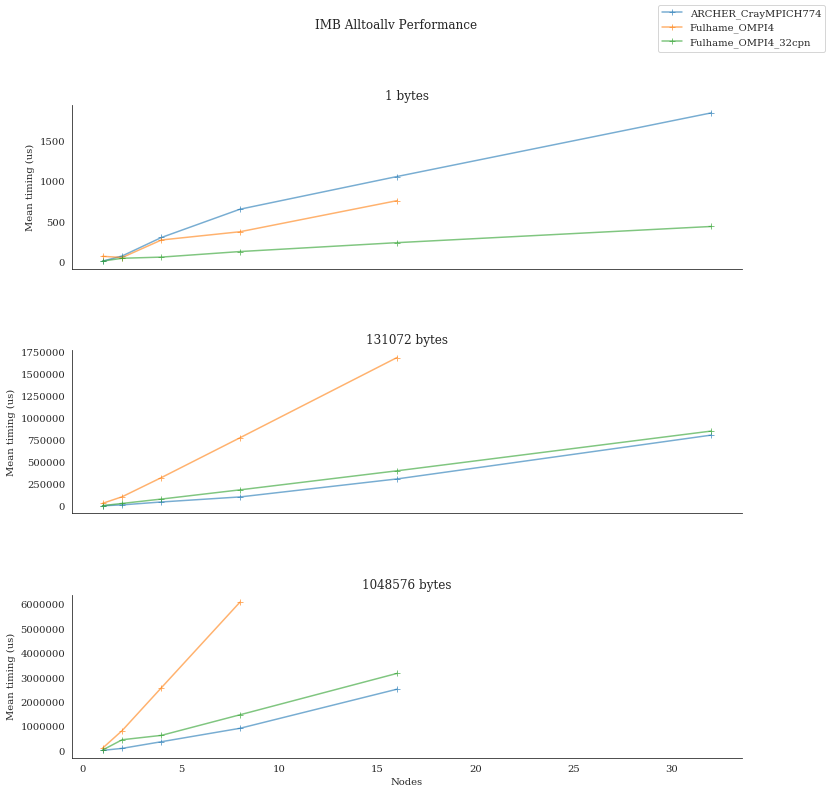

In [68]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

In [69]:
baseline = 'ARCHER_CrayMPICH774'
systems = ['Fulhame_OMPI4',
           'Fulhame_OMPI4_32cpn'
          ]
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)

IMB Alltoallv performance relative to ARCHER_CrayMPICH774
            #nodes
      #bytes         1         2         4         8        16        32
Fulhame_OMPI4
           0      0.31      0.07      0.05      0.09      0.12      0.00
           1      0.20      1.32      1.11      1.74      1.39      0.00
           2      0.20      1.27      1.11      1.32      1.66      0.00
           4      0.20      1.27      1.10      1.65      1.49      0.00
           8      0.20      1.22      1.04      1.47      1.50      0.00
          16      0.20      0.88      0.90      1.26      1.18      0.00
          32      0.19      0.75      0.89      0.73      0.78      0.00
          64      0.23      0.27      0.68      0.58      0.14      0.00
         128      0.20      0.14      0.41      0.16      0.13      0.00
         256      0.20      0.18      0.27      0.19      0.15      0.00
         512      0.22      0.17      0.28      0.24      0.20      0.00
        1024      0.25      0.15 

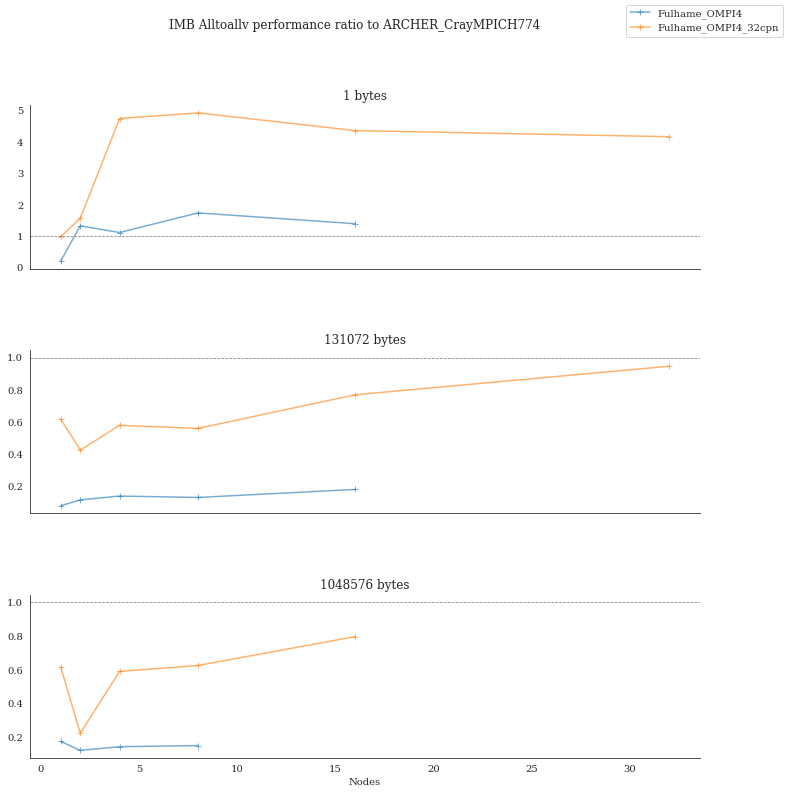

In [70]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')